In [187]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-data/Tatasteel.csv
/kaggle/input/stock-data/britannia.csv
/kaggle/input/stock-data/Reliance.csv
/kaggle/input/stock-data/ongc.csv
/kaggle/input/full-data/RELIANCE.NS.csv


In [188]:
reliance = pd.read_csv("/kaggle/input/stock-data/Reliance.csv")
tata = pd.read_csv("/kaggle/input/stock-data/Tatasteel.csv")
bri = pd.read_csv("/kaggle/input/stock-data/britannia.csv")
ongc = pd.read_csv("/kaggle/input/stock-data/ongc.csv")

In [189]:
bri["Series"] = bri["Series"].str.replace('N2','E1')

In [190]:
data_frame = [reliance,tata,bri,ongc]
company_list = ["Reliance","Tata_steel","Britannia","Ongc"]

In [191]:
for data in range(len(data_frame)):
    data_frame[data] = data_frame[data].drop(index= data_frame[data][data_frame[data]['Series'] == 'E1'].index)
    data_frame[data] = data_frame[data].drop(['Symbol','Series','Last Price'],axis = 1)

In [192]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Reliance", "Tata", "Britannia", "Ongc"))
count = 0
for i1 in range(1,3):
    for j1 in range(1,3):
        fig.add_trace(
            go.Scatter(
                x=data_frame[count]["Date"],
                y=data_frame[count]["Close Price"],
                mode="lines",
                ),
                row=i1, col=j1
                )
        count +=1
fig.update_layout(template = "plotly_dark" , width=800,height=800,)
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [193]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Reliance", "Tata", "Britannia", "Ongc"))
count = 0
for i1 in range(1,3):
    for j1 in range(1,3):
        fig.add_trace(
            go.Scatter(
                x=data_frame[count]["Date"],
                y=data_frame[count]["Total Traded Quantity"],
                mode="lines",
                ),
                row=i1, col=j1
                )
        count +=1
fig.update_layout(template = "plotly_dark" , width=1000,height=800)
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [194]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Reliance", "Tata", "Britannia", "Ongc"))
count = 0
for i1 in range(1,3):
    for j1 in range(1,3):
        fig.add_trace(
            go.Scatter(
                x=data_frame[count]["Date"],
                y=data_frame[count]["No. of Trades"],
                mode="lines"
                ),
                row=i1, col=j1
                )
        count +=1
fig.update_layout(template = "plotly_dark" , width=1000,height=800)
#fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [195]:
fig = go.Figure(data=go.Splom(
                  dimensions=[dict(label='Close Price', values=data_frame[0]['Close Price']),
                              dict(label='Open Price', values=data_frame[0]['Open Price']),
                              dict(label='High Price', values=data_frame[0]['High Price']),
                              dict(label='Low Price', values=data_frame[0]['Low Price']),
                              dict(label='Total Traded Quantity', values=data_frame[0]['Total Traded Quantity']),
                              dict(label='Turnover', values=data_frame[0]['Turnover']),
                              dict(label='No. of Trades', values=data_frame[0]['No. of Trades']),
                              dict(label='Deliverable Qty	', values=data_frame[0]['Deliverable Qty'])],
                  marker=dict(color="#EF553B",
                              size=5,
                              )))
fig.update_layout(template = "plotly_dark" , width=1200,height=1200)
fig.show()

In [196]:
group_labels = ['Close Price','Open Price']
colours = ["#EF553B" , "#FECB52"]
fig = ff.create_distplot([data_frame[0]['Close Price'], data_frame[0]['Open Price']], group_labels, bin_size=10,
                         curve_type='normal',colors=colours)
fig.update_layout(template = "plotly_dark")
fig.show()

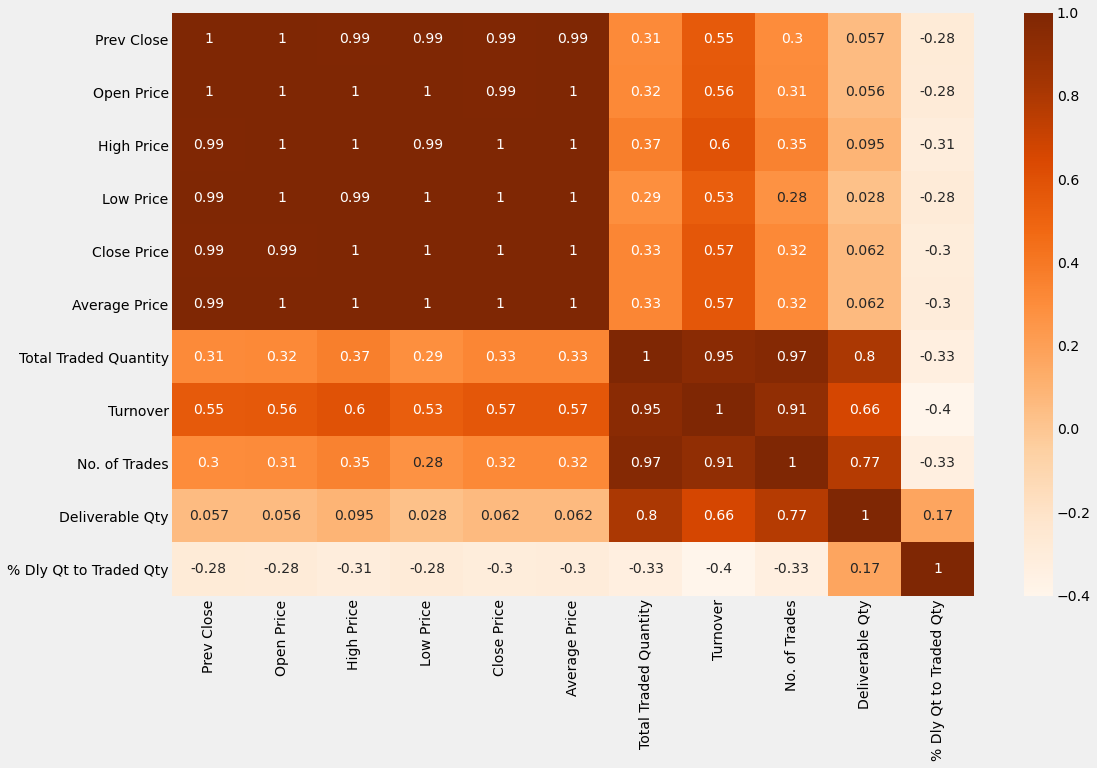

In [197]:
plt.figure(figsize=(16, 10))
sns.heatmap(data_frame[0].corr(), annot=True, cmap='Oranges')

In [198]:
data_frame[0]['tata_close_price'] = data_frame[1]['Close Price']
data_frame[0]['bri_close_price'] = data_frame[2]['Close Price']
data_frame[0]['ongc_close_price'] = data_frame[3]['Close Price']

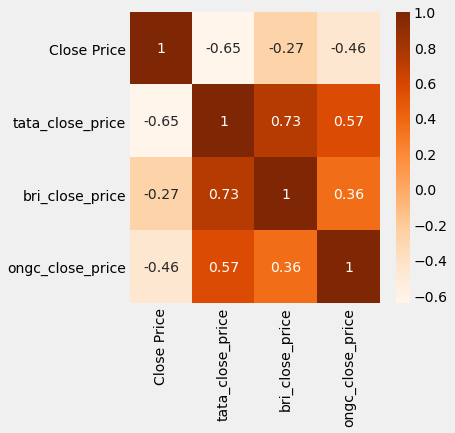

In [199]:
cols = ['Close Price','tata_close_price','bri_close_price','ongc_close_price']
data = data_frame[0][cols].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(data, annot=True, cmap='Oranges')

In [200]:
df = data_frame[0].filter(['Close Price'])


In [237]:
from keras.models import Sequential
from keras.layers import Dense ,LSTM

def model_train_predict(x_train , y_train , x_test , epoch , size):
    model = Sequential()
    model.add(LSTM(50 , return_sequences =True , input_shape = (x_train.shape[1],1)))
    model.add(LSTM(50 , return_sequences =False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer ='adam',loss='mean_squared_error')
    model.fit(x_train,y_train , batch_size = size , epochs = epoch)
    prediction = model.predict(x_test)
    predictions = scaler.inverse_transform(prediction)
    return predictions


In [202]:
dataset = df.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

394

In [203]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler.fit_transform(dataset)


In [204]:
train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


In [205]:
x_train,y_train = np.array(x_train),np.array(y_train)


In [206]:
x_train = np.reshape(x_train ,(x_train.shape[0],x_train.shape[1],1))

In [207]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len :,: ]
for i in range(60 ,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1],1))

In [208]:
predictions = model_train_predict(x_train ,y_train, x_test , 50 , 1)

Epoch 1/50
334/334 [==============================] - 2s 6ms/step - loss: 0.0035
Epoch 2/50
334/334 [==============================] - 2s 7ms/step - loss: 0.0015
Epoch 3/50
334/334 [==============================] - 2s 6ms/step - loss: 0.0011
Epoch 4/50
334/334 [==============================] - 2s 6ms/step - loss: 0.0010
Epoch 5/50
334/334 [==============================] - 2s 6ms/step - loss: 9.4681e-04
Epoch 6/50
334/334 [==============================] - 2s 6ms/step - loss: 8.8358e-04
Epoch 7/50
334/334 [==============================] - 2s 6ms/step - loss: 9.4040e-04
Epoch 8/50
334/334 [==============================] - 2s 6ms/step - loss: 7.3218e-04
Epoch 9/50
334/334 [==============================] - 2s 6ms/step - loss: 6.2656e-04
Epoch 10/50
334/334 [==============================] - 2s 6ms/step - loss: 6.0075e-04
Epoch 11/50
334/334 [==============================] - 2s 6ms/step - loss: 6.3182e-04
Epoch 12/50
334/334 [==============================] - 2s 6ms/step - loss: 6.62

In [209]:
np.concatenate((y_test,predictions),axis = 1)

array([[ 943.4       ,  973.47393799],
       [1082.25      ,  849.24304199],
       [1066.2       , 1025.71948242],
       [1065.6       , 1138.68139648],
       [1030.45      , 1003.78289795],
       [1113.75      , 1011.00836182],
       [1080.45      , 1100.80700684],
       [1077.45      , 1093.94189453],
       [1206.1       , 1043.46533203],
       [1192.15      , 1170.69189453],
       [1219.95      , 1220.8828125 ],
       [1189.15      , 1176.68701172],
       [1149.85      , 1182.70251465],
       [1168.05      , 1147.32165527],
       [1224.        , 1139.53979492],
       [1243.8       , 1214.17834473],
       [1237.35      , 1239.51269531],
       [1363.6       , 1215.93444824],
       [1370.9       , 1343.45458984],
       [1417.        , 1372.86010742],
       [1429.75      , 1389.17224121],
       [1428.15      , 1419.98547363],
       [1426.95      , 1414.29077148],
       [1466.        , 1413.51928711],
       [1435.2       , 1459.31091309],
       [1460.65      , 14

In [210]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

31.01356686961895

In [211]:
df1 = data_frame[0].filter(['Date'])

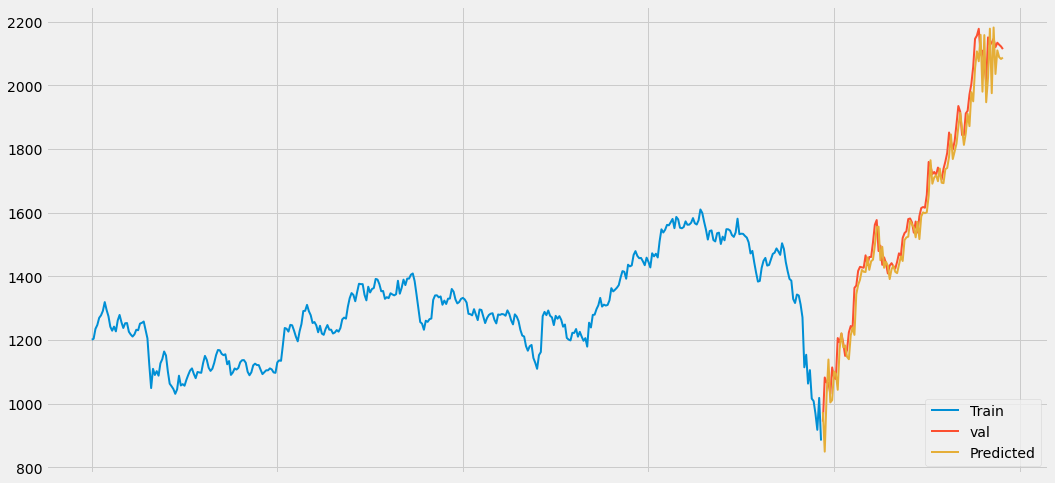

In [212]:
plt.figure(figsize = (16,8))
train = df[:training_data_len]
valid = df[training_data_len:]
valid['predict'] = predictions
plt.plot(train['Close Price'] , linewidth = 2)
plt.plot(valid[['Close Price' , 'predict']], linewidth = 2)
plt.legend(['Train' ,'val' ,'Predicted'], loc = 'lower right')
plt.tick_params(
    axis='x',          
    which='both',   
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()

In [213]:
# FULL DATA PREDICTION RELIANCE 

In [214]:
full_data = pd.read_csv("/kaggle/input/full-data/RELIANCE.NS.csv")
full_data.shape

(6209, 7)

In [215]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6209 entries, 0 to 6208
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6209 non-null   object 
 1   Open       6083 non-null   float64
 2   High       6083 non-null   float64
 3   Low        6083 non-null   float64
 4   Close      6083 non-null   float64
 5   Adj Close  6083 non-null   float64
 6   Volume     6083 non-null   float64
dtypes: float64(6), object(1)
memory usage: 339.7+ KB


In [216]:
full_data.dropna(inplace = True)

In [217]:
full_data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [218]:
df = full_data.filter(['Close'])

In [219]:
fig = px.line(full_data , x = 'Date' , y = 'Close')
fig.show()

In [220]:
dataset = df.values
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

4867

In [221]:
scaler1 = MinMaxScaler(feature_range =(0,1))
scaled_data = scaler1.fit_transform(dataset)


In [222]:
train_data = scaled_data[0:training_data_len,:]
x_train =[]
y_train =[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])


In [223]:
x_train,y_train = np.array(x_train),np.array(y_train)
x_train = np.reshape(x_train ,(x_train.shape[0],x_train.shape[1],1))

In [224]:
test_data = scaled_data[training_data_len - 60:,:]
x_test = []
y_test = dataset[training_data_len :,: ]
for i in range(60 ,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test , (x_test.shape[0],x_test.shape[1],1))

In [238]:
predictions = model_train_predict(x_train ,y_train, x_test , 100 , 1)

Epoch 1/100
4807/4807 [==============================] - 30s 6ms/step - loss: 1.3760e-04
Epoch 2/100
4807/4807 [==============================] - 31s 6ms/step - loss: 8.4458e-05
Epoch 3/100
4807/4807 [==============================] - 30s 6ms/step - loss: 4.9579e-05
Epoch 4/100
4807/4807 [==============================] - 30s 6ms/step - loss: 4.5380e-05
Epoch 5/100
4807/4807 [==============================] - 30s 6ms/step - loss: 4.4673e-05
Epoch 6/100
4807/4807 [==============================] - 31s 6ms/step - loss: 3.9633e-05
Epoch 7/100
4807/4807 [==============================] - 29s 6ms/step - loss: 3.7529e-05
Epoch 8/100
4807/4807 [==============================] - 29s 6ms/step - loss: 3.6907e-05
Epoch 9/100
4807/4807 [==============================] - 29s 6ms/step - loss: 3.6371e-05
Epoch 10/100
4807/4807 [==============================] - 30s 6ms/step - loss: 3.5226e-05
Epoch 11/100
4807/4807 [==============================] - 29s 6ms/step - loss: 3.4442e-05
Epoch 12/100
4807/4

4807/4807 [==============================] - 30s 6ms/step - loss: 2.0411e-05
Epoch 93/100
4807/4807 [==============================] - 28s 6ms/step - loss: 2.0651e-05
Epoch 94/100
4807/4807 [==============================] - 29s 6ms/step - loss: 2.0904e-05
Epoch 95/100
4807/4807 [==============================] - 28s 6ms/step - loss: 2.0542e-05
Epoch 96/100
4807/4807 [==============================] - 28s 6ms/step - loss: 2.0313e-05
Epoch 97/100
4807/4807 [==============================] - 29s 6ms/step - loss: 2.0879e-05
Epoch 98/100
4807/4807 [==============================] - 28s 6ms/step - loss: 2.1106e-05
Epoch 99/100
4807/4807 [==============================] - 28s 6ms/step - loss: 2.0478e-05
Epoch 100/100
4807/4807 [==============================] - 29s 6ms/step - loss: 2.0515e-05


In [239]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

417.9475315513145

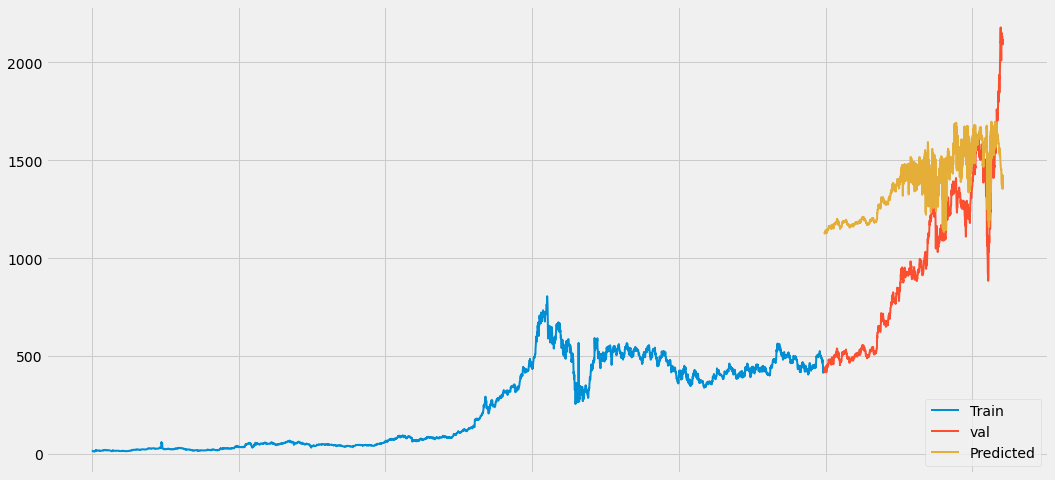

In [240]:
plt.figure(figsize = (16,8))
train = df[:training_data_len]
valid = df[training_data_len:]
valid['predict'] = predictions
plt.plot(train['Close'] , linewidth = 2)
plt.plot(valid[['Close' , 'predict']], linewidth = 2)
plt.legend(['Train' ,'val' ,'Predicted'], loc = 'lower right')
plt.tick_params(
    axis='x',          
    which='both',   
    bottom=False,      
    top=False,         
    labelbottom=False)
plt.show()